<a href="https://colab.research.google.com/github/sandeepexe/AIML/blob/main/aimlproject5thsem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


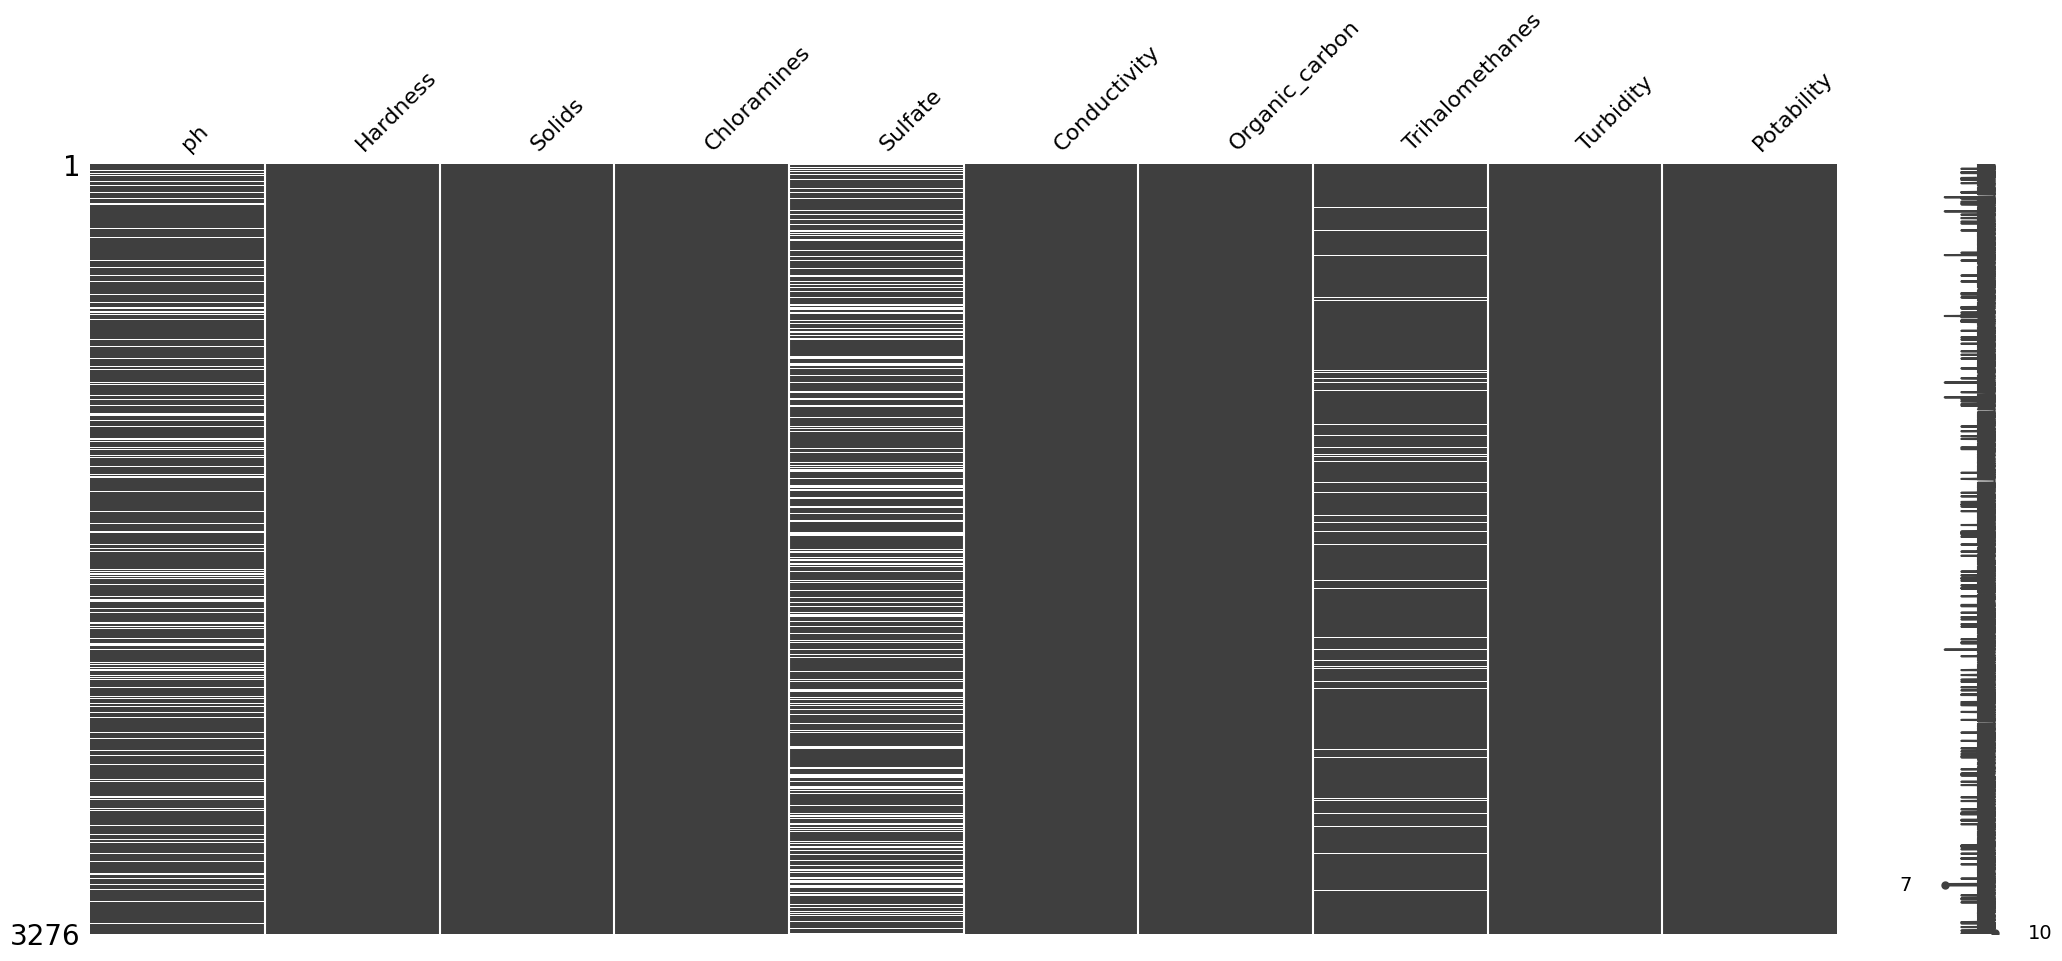

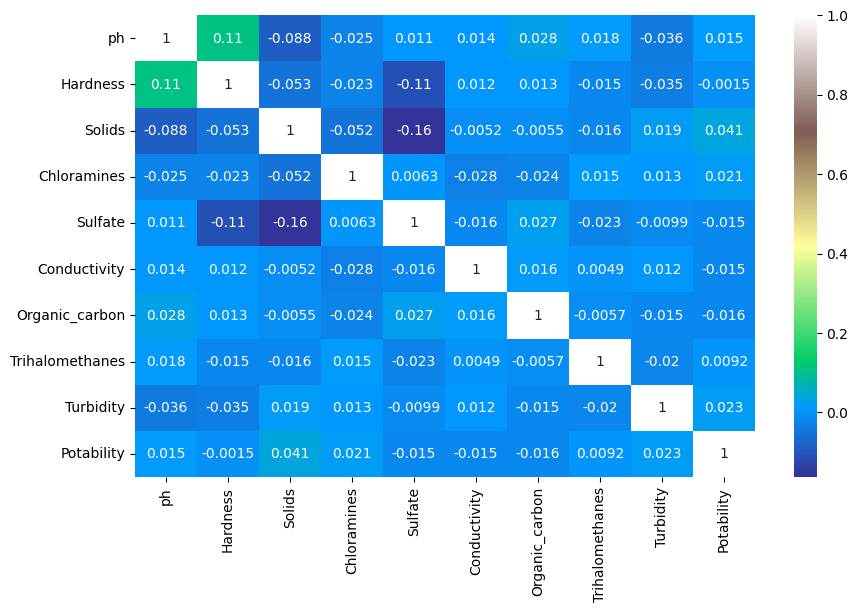

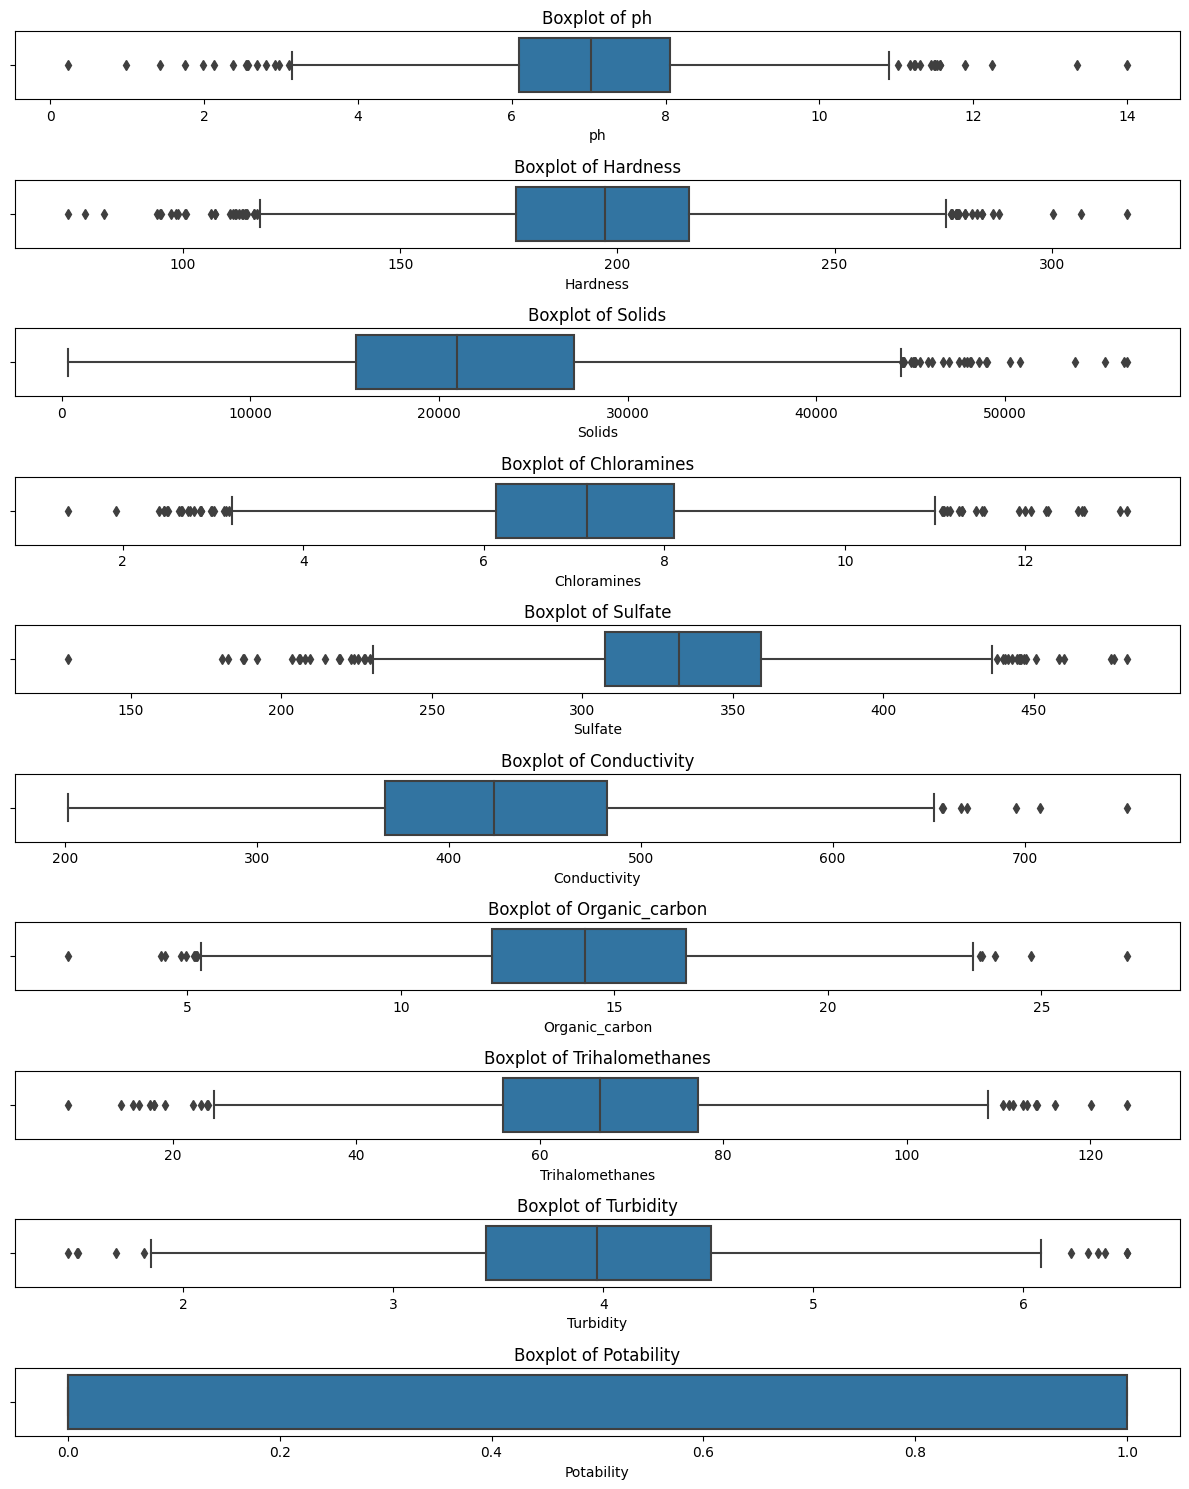

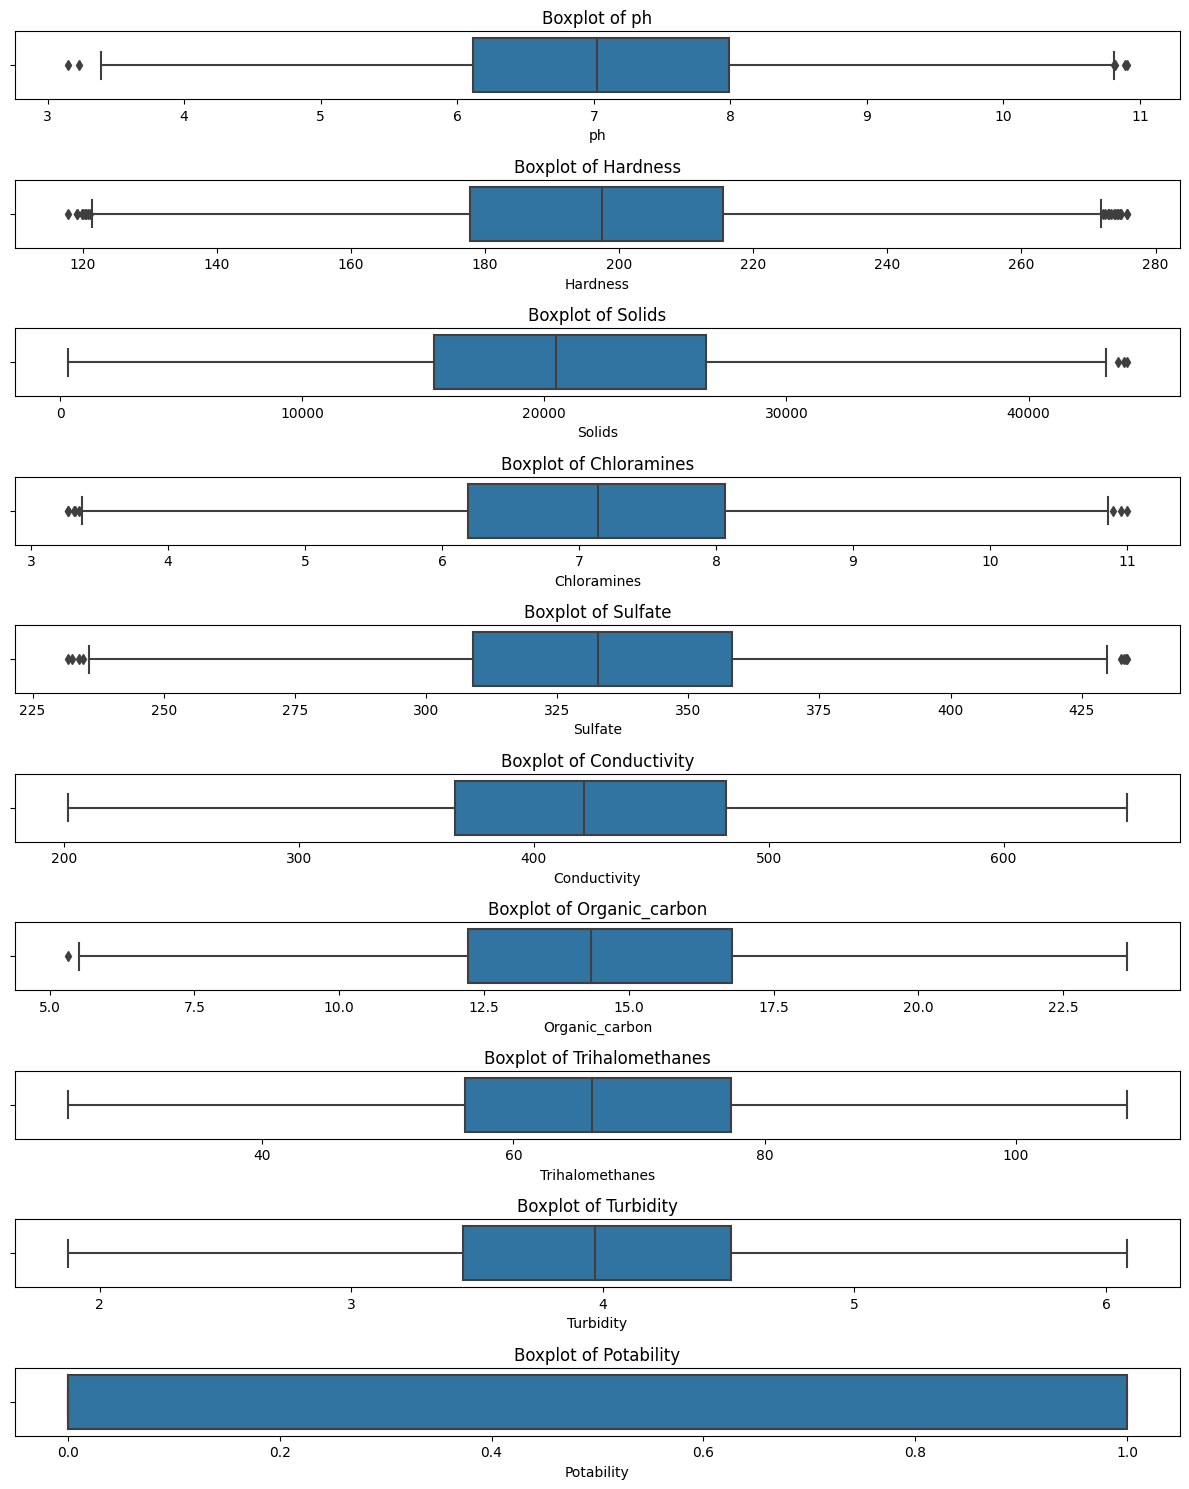

Conditonal Statements to fill in the Missing Values of PH Value Column


if Potability = 0 and Hardness <= 150
PH VALUE : 6.7220


if Potability = 0 and Hardness > 150
PH VALUE : 7.1125


if Potability = 1 and Hardness <= 150
PH VALUE : 7.0982


if Potability = 1 and Hardness > 150
PH VALUE : 7.0714
Conditonal Statements to fill in the Missing Values of Sulfate Column


if Potability = 0
Sulfate : 334.5643


if Potability = 1
Sulfate : 332.5670
Mean of Trihalomethanes : 66.3963
Mean of Trihalomethanes : 66.3963
Mean of Trihalomethanes : 66.3963
Mean of Trihalomethanes : 66.3963
Mean of Trihalomethanes : 66.3963
Mean of Trihalomethanes : 66.3963
Mean of Trihalomethanes : 66.3963
Mean of Trihalomethanes : 66.3963
Mean of Trihalomethanes : 66.3963
Mean of Trihalomethanes : 66.3963
Mean of Trihalomethanes : 66.3963
Mean of Trihalomethanes : 66.3963
Mean of Trihalomethanes : 66.3963
Mean of Trihalomethanes : 66.3963
Mean of Trihalomethanes : 66.3963
Mean of Trihalomethanes : 66.3963
Mean of

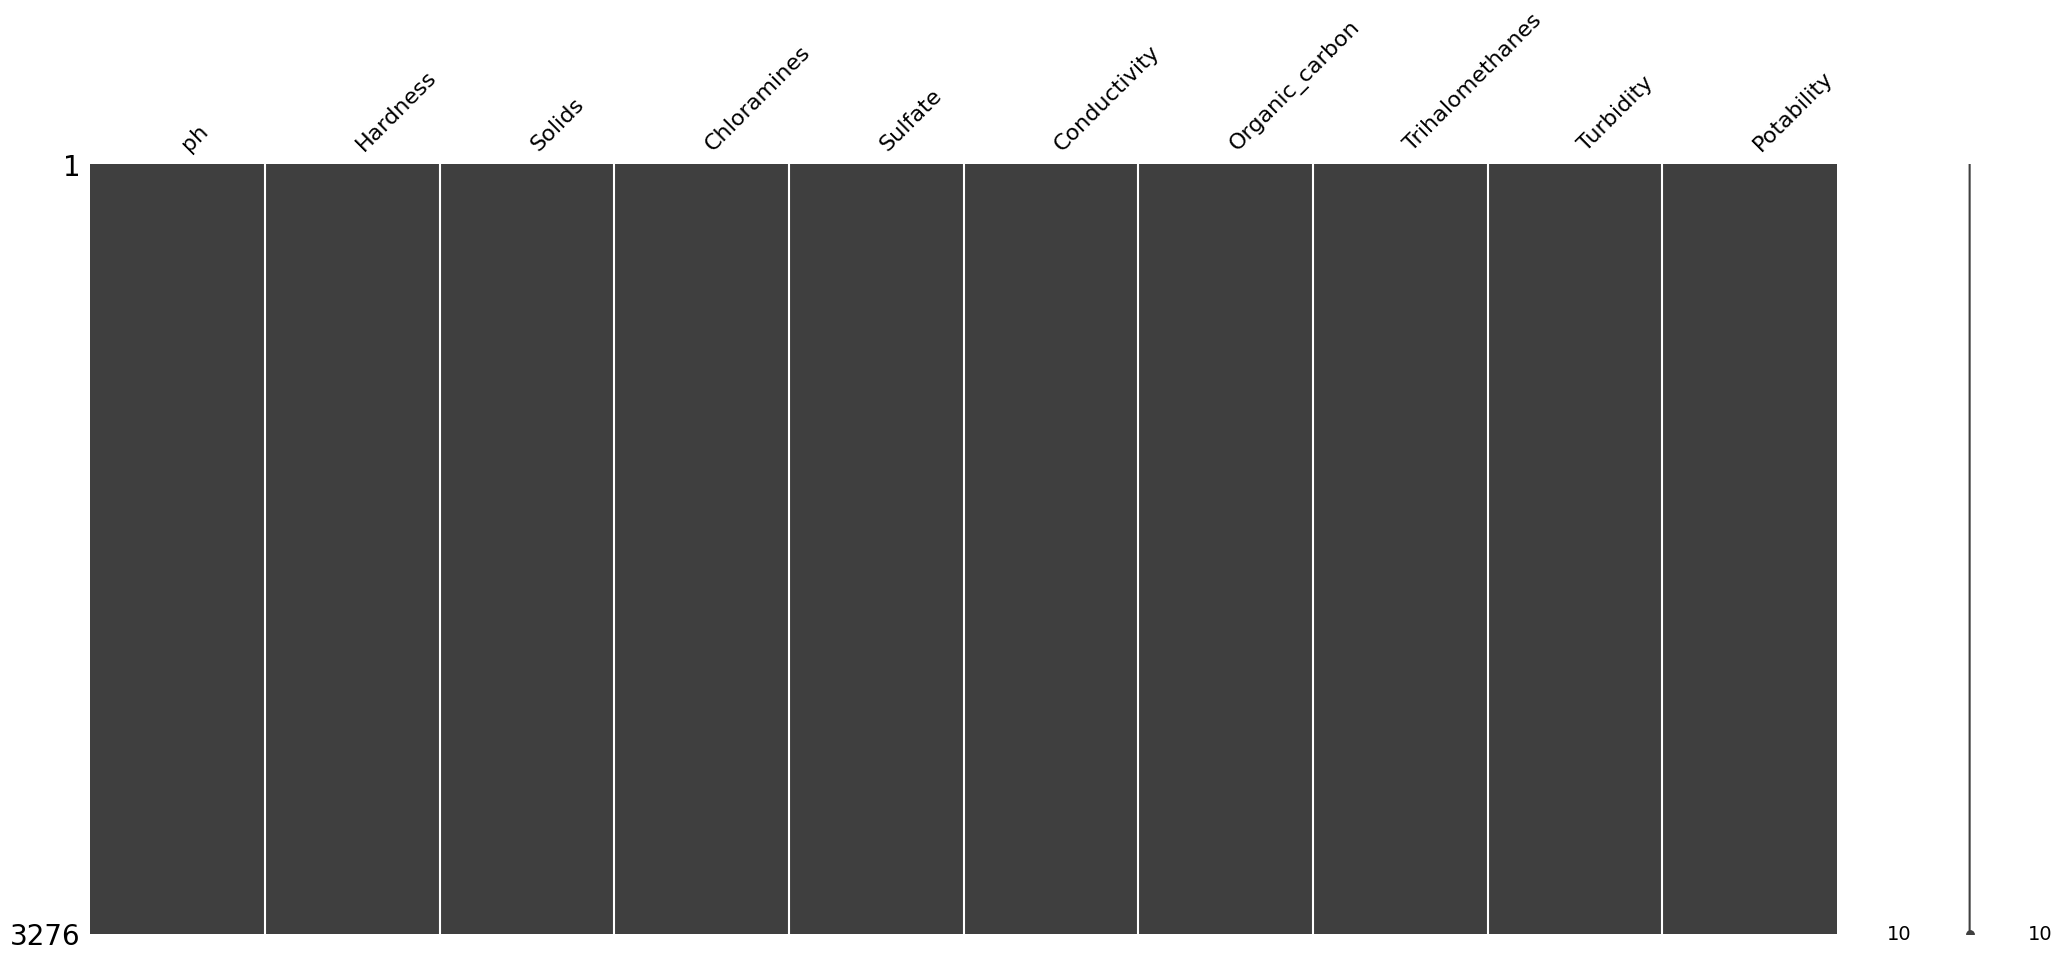

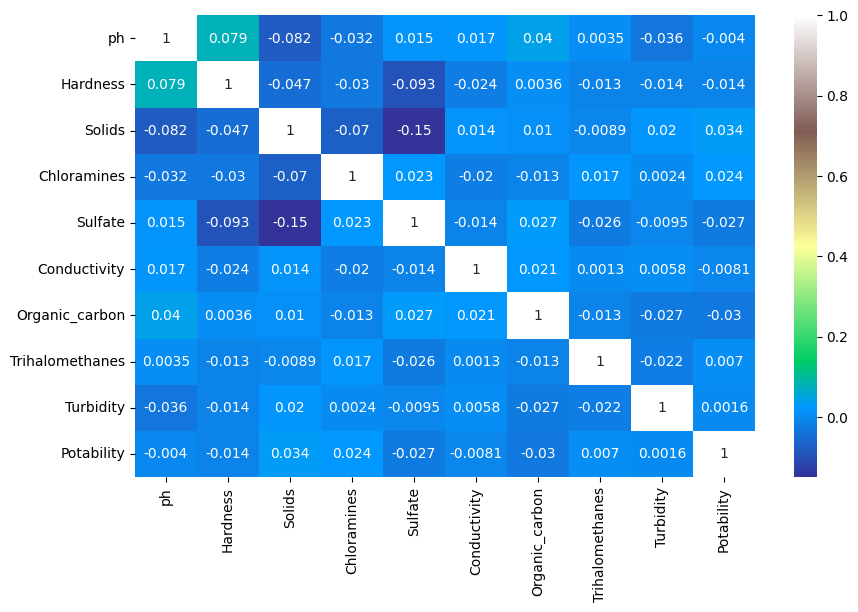

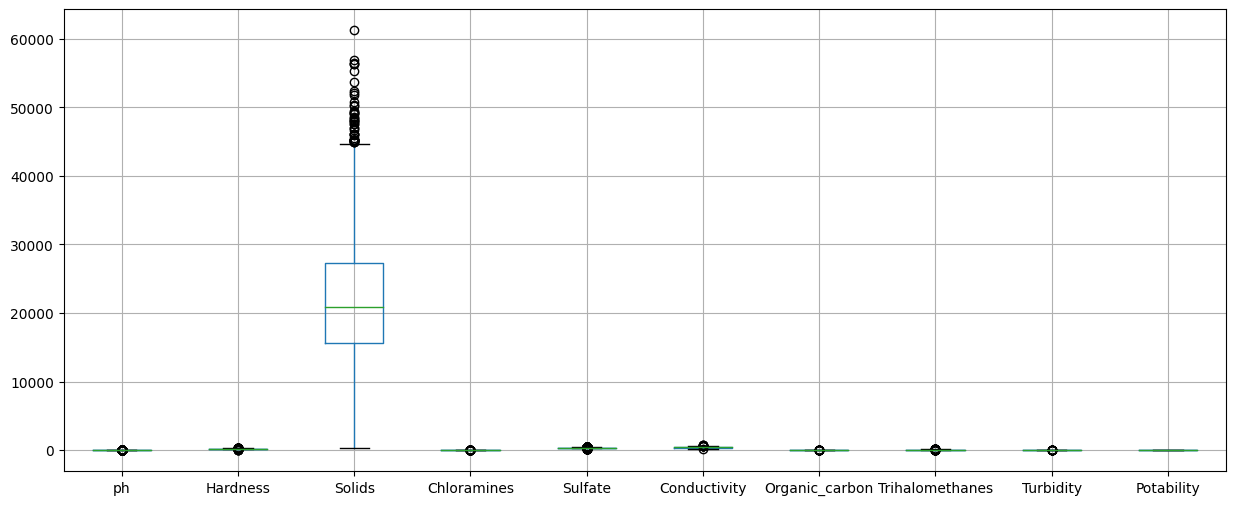

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/Ashutosh-Gairola/I-AI-ML/main/water_potability.csv")

df.head()
df.columns
df.info()
df.dtypes
df.describe()
import missingno as msno
msno.matrix(df)
plt.show()
df1=df.copy()
df1.shape
df1.isnull().sum()
df1 = df1.dropna()
df1.shape
sns.heatmap(df1.corr(),annot= True,cmap='terrain')
fig= plt.gcf()
fig.set_size_inches(10,6)
plt.show()
columns_to_plot = df1.columns.values.tolist()
plt.figure(figsize=(12, 15))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)
    sns.boxplot(x=df1[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.tight_layout()

plt.show()
# Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    # Remove outliers for each specified column
for column in columns_to_plot:
    df1 = remove_outliers_iqr(df1, column)

# Reset index after removing outliers
df1.reset_index(drop=True, inplace=True)
plt.figure(figsize=(12, 15))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)
    sns.boxplot(x=df1[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.tight_layout()

plt.show()
df1.shape
df2 = df.copy()
df2.isnull().sum()
import warnings
warnings.filterwarnings('ignore')

print('Conditonal Statements to fill in the Missing Values of PH Value Column')

print("\n")
print('if Potability = 0 and Hardness <= 150')
condition_1_mean_ph = df2[(df2['Potability'] == 0) & (df2['Hardness'] <= 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_1_mean_ph)))

print("\n")
print('if Potability = 0 and Hardness > 150')
condition_2_mean_ph = df2[(df2['Potability'] == 0) & (df2['Hardness'] > 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_2_mean_ph)))


print("\n")
print('if Potability = 1 and Hardness <= 150')
condition_3_mean_ph = df2[(df2['Potability'] == 1) & (df2['Hardness'] <= 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_3_mean_ph)))

print("\n")
print('if Potability = 1 and Hardness > 150')
condition_4_mean_ph = df2[(df2['Potability'] == 1) & (df2['Hardness'] > 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_4_mean_ph)))
for x in range(0, len(df2)) :
    if (pd.isnull(df2['ph'][x]) == True) :
        if ((df2['Potability'][x] == 0) & (df2['Hardness'][x] <= 150)) : df2['ph'][x] = condition_1_mean_ph
        elif ((df2['Potability'][x] == 0) & (df2['Hardness'][x] > 150)) : df2['ph'][x] = condition_2_mean_ph
        elif ((df2['Potability'][x] == 1) & (df2['Hardness'][x] <= 150)) : df2['ph'][x] = condition_3_mean_ph
        elif ((df2['Potability'][x] == 1) & (df2['Hardness'][x] > 150)) : df2['ph'][x] = condition_4_mean_ph
print('Conditonal Statements to fill in the Missing Values of Sulfate Column')

print("\n")
print('if Potability = 0')
condition_1_mean_sulfate = df2[(df2['Potability'] == 0)][['Sulfate']].mean()
print("Sulfate : {:.4f}".format(float(condition_1_mean_sulfate)))

print("\n")
print('if Potability = 1')
condition_2_mean_sulfate = df2[(df2['Potability'] == 1)][['Sulfate']].mean()
print("Sulfate : {:.4f}".format(float(condition_2_mean_sulfate)))
for x in range(0, len(df2)) :
    if (pd.isnull(df2['Sulfate'][x]) == True) :
        if (df2['Potability'][x] == 0) : df2['Sulfate'][x] = condition_1_mean_sulfate
        else : df2['Sulfate'][x] = condition_2_mean_sulfate
        print("Mean of Trihalomethanes : {:.4f}".format(float(df2['Trihalomethanes'].mean())))

df2['Trihalomethanes'].fillna(value = df2['Trihalomethanes'].mean() , inplace = True)
msno.matrix(df2)
plt.show()
sns.heatmap(df2.corr(),annot= True,cmap='terrain')
fig= plt.gcf()
fig.set_size_inches(10,6)
plt.show()

#we are trying the reduce the dimension to which are correlating for that we are looking for the similarity of the features with this chart
#because less feature is making easy to the predict but we have so small similarity of the features and we cant use the remove feature
df2.boxplot(figsize=(15,6))
plt.show()

#You can see outliers but if we remove this outliers we cant have good predict the result will be closer to good water
#Our purpose in not removing outlier is to estimate from a wide range of data.
df2['Solids'].describe()
#this data shows us a mean value is a 22014 around and %75 is a 27000 around %25 around 15000
df2['Potability'].value_counts()
import plotly.express as px
fig = px.pie(df2,names ="Potability",hole = 0.4,template ="plotly_dark")
fig.show()
fig = px.scatter(df2,x ="ph",y="Hardness",color= "Potability",template="plotly_dark")
fig.show()
# sulfate and solids's similarity is a 0.076 and here is the distribution of those data
fig = px.scatter(df2,x ="Organic_carbon",y="Hardness",color= "Potability",template="plotly_dark")
fig.show()
# sulfate and solids's similarity is a 0.04 and here is the distribution of those data
fig = px.scatter(df2,x ="Sulfate",y="Solids",color= "Potability",template="plotly_dark")
fig.show()
# sulfate and solids's similarity is a -0.15 and here is the distribution of those data


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define features and target
X = df2.drop('Potability', axis=1)
y = df2['Potability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, log_reg_pred))

# Decision Tree
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
dec_tree_pred = dec_tree.predict(X_test)
print("Decision Tree Accuracy: ", accuracy_score(y_test, dec_tree_pred))

# Random Forest
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
rand_forest_pred = rand_forest.predict(X_test)
print("Random Forest Accuracy: ", accuracy_score(y_test, rand_forest_pred))

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("K-Nearest Neighbors Accuracy: ", accuracy_score(y_test, knn_pred))

Logistic Regression Accuracy:  0.6280487804878049
Decision Tree Accuracy:  0.7103658536585366
Random Forest Accuracy:  0.7926829268292683
K-Nearest Neighbors Accuracy:  0.538109756097561
